# Tutorial 5: Laplace's Equation in 3D Electrostatics

The goal of this project is to solve Laplace's equation in 3D for an electrostatic field.
Given the Laplace's equation:
$$ \nabla^2 \Phi = 0 $$

where $\Phi$ represents the electric potential, the electric field $\vec{E}$ can be derived as:
$$ \vec{E} = -\nabla \Phi $$

We will use Python along with Geometric Algebra to solve and visualize this problem.


## Import Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from pyvista import Plotter  # For 3D plotting


## 1. Setting Up the Problem

We'll define a 3D computational domain and establish boundary conditions for solving Laplace's equation.
In this case, we assume a simple cubic domain with fixed potentials at certain faces as boundary conditions.

In [2]:
# Define the 3D grid domain
nx, ny, nz = 50, 50, 50  # Define grid resolution
dx = dy = dz = 1.0  # Define grid spacing

# Initialize the potential grid
phi = np.zeros((nx, ny, nz))

# Boundary conditions: example with a grounded cube with conducting planes at boundaries
# Here we set phi to 100 on one face as a boundary condition
phi[0, :, :] = 100  # Boundary condition on one face
phi[-1, :, :] = 0   # Grounded opposite face


## 2. Implementing the Numerical Solver

We'll discretize Laplace's equation using the Finite Difference Method (FDM) and use an iterative solver.
In this case, we'll use a simple Jacobi iterative approach to update the potential field.

In [3]:
# Jacobi iterative solver for Laplace's equation
def solve_laplace(phi, tol=1e-5, max_iterations=10000):
    for it in range(max_iterations):
        phi_old = phi.copy()
        phi[1:-1, 1:-1, 1:-1] = (phi_old[:-2, 1:-1, 1:-1] + phi_old[2:, 1:-1, 1:-1] +
                                 phi_old[1:-1, :-2, 1:-1] + phi_old[1:-1, 2:, 1:-1] +
                                 phi_old[1:-1, 1:-1, :-2] + phi_old[1:-1, 1:-1, 2:]) / 6
        
        # Check convergence
        if np.max(np.abs(phi - phi_old)) < tol:
            print(f"Converged in {it} iterations.")
            break
    return phi

# Run the solver
phi = solve_laplace(phi)


Converged in 4309 iterations.


## 3. Visualizing the Results

We will visualize the 3D potential field and compute the electric field lines from the gradient of the potential.

/Users/guidoputignano/anaconda3/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


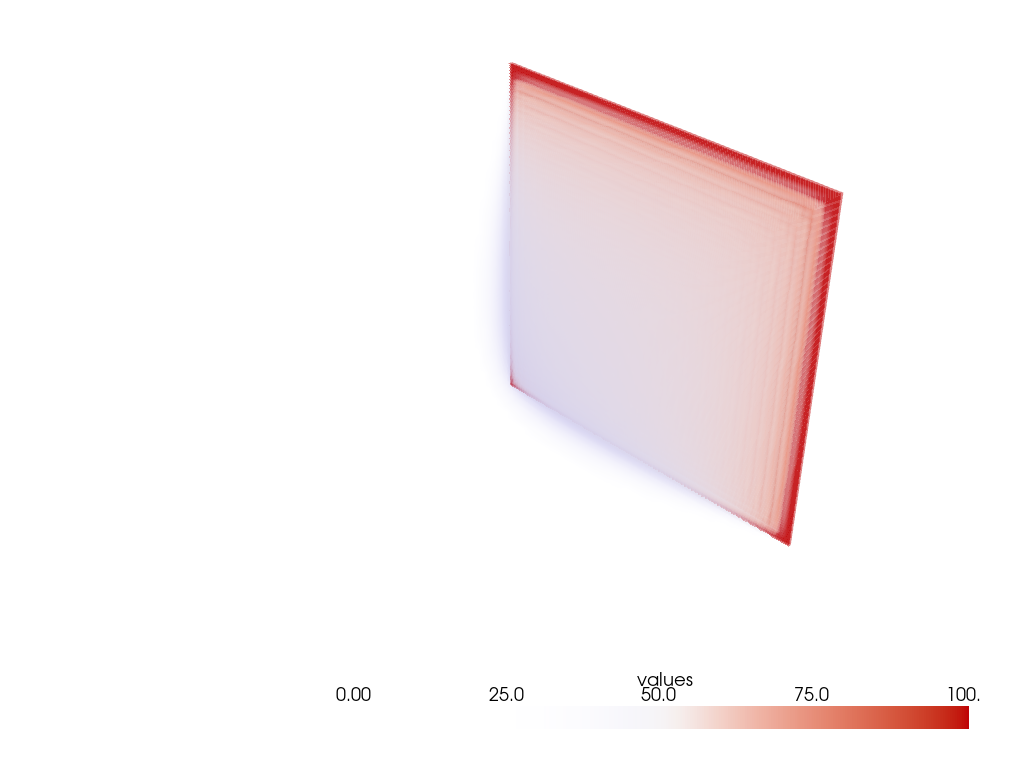

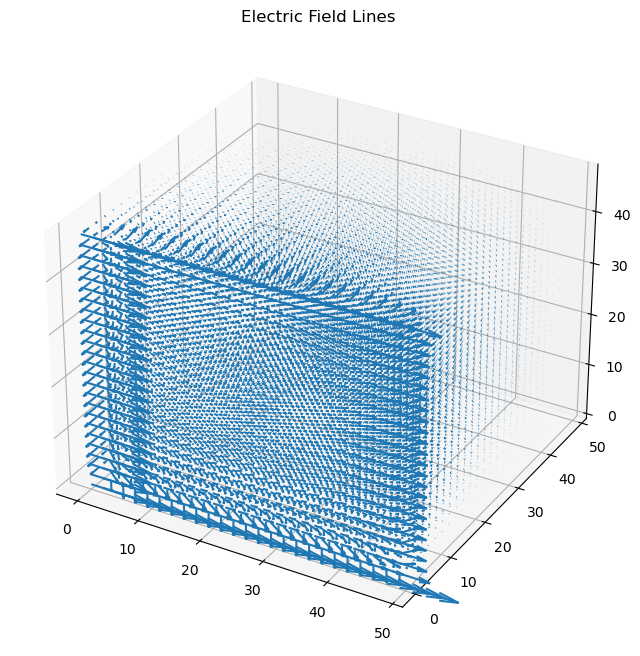

In [4]:
# Visualize the potential field in 3D
def plot_potential(phi):
    plotter = Plotter()
    plotter.add_volume(phi, cmap="coolwarm", opacity="sigmoid")
    plotter.show(title="3D Potential Field")

# Call the function to plot the potential field
plot_potential(phi)

# Compute the electric field as E = -∇Φ
Ex, Ey, Ez = np.gradient(-phi, dx, dy, dz)

# Plot electric field lines
def plot_electric_field(Ex, Ey, Ez):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    X, Y, Z = np.meshgrid(np.arange(0, nx, 2), np.arange(0, ny, 2), np.arange(0, nz, 2))
    ax.quiver(X, Y, Z, Ex[::2, ::2, ::2], Ey[::2, ::2, ::2], Ez[::2, ::2, ::2], length=0.1)
    plt.title("Electric Field Lines")
    plt.show()

# Call the function to plot the electric field
plot_electric_field(Ex, Ey, Ez)


## 4. Analysis and Verification

To validate the solution, we can compare it to an analytical result if available or calculate the error in convergence.

In [5]:
import numpy as np

def solve_laplace(phi, tol=1e-5, max_iterations=10000):
    for it in range(max_iterations):
        phi_old = phi.copy()
        phi[1:-1, 1:-1, 1:-1] = (phi_old[:-2, 1:-1, 1:-1] + phi_old[2:, 1:-1, 1:-1] +
                                 phi_old[1:-1, :-2, 1:-1] + phi_old[1:-1, 2:, 1:-1] +
                                 phi_old[1:-1, 1:-1, :-2] + phi_old[1:-1, 1:-1, 2:]) / 6

        # Check convergence
        if np.max(np.abs(phi - phi_old)) < tol:
            print(f"Converged in {it} iterations.")
            break
    return phi

def analyze_error(phi):
    # Create a fresh copy of the original phi array
    phi_initial = np.zeros_like(phi)
    phi_initial[0, :, :] = 100  # Boundary condition on one face
    phi_initial[-1, :, :] = 0   # Grounded opposite face

    # Solve Laplace's equation with the initial phi
    phi_solution = solve_laplace(phi_initial)

    # Compute the error
    error = np.max(np.abs(phi[1:-1, 1:-1, 1:-1] - phi_solution[1:-1, 1:-1, 1:-1]))
    print(f"Error relative to analytical solution (if available): {error}")
    return error

# Define the 3D grid domain
nx, ny, nz = 50, 50, 50  # Define grid resolution
dx = dy = dz = 1.0  # Define grid spacing

# Initialize the potential grid
phi = np.zeros((nx, ny, nz))

# Boundary conditions: example with a grounded cube with conducting planes at boundaries
# Here we set phi to 100 on one face as a boundary condition
phi[0, :, :] = 100  # Boundary condition on one face
phi[-1, :, :] = 0   # Grounded opposite face

# Run the solver
phi = solve_laplace(phi)

# Analyze and print error
error = analyze_error(phi)
print(f"Numerical Error: {error}")

Converged in 4309 iterations.
Converged in 4309 iterations.
Error relative to analytical solution (if available): 0.0
Numerical Error: 0.0
